# **Notebook 3**
### Diagramas de Persistencia

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import tadasets
import matplotlib
plt.rcParams.update(plt.rcParamsDefault)

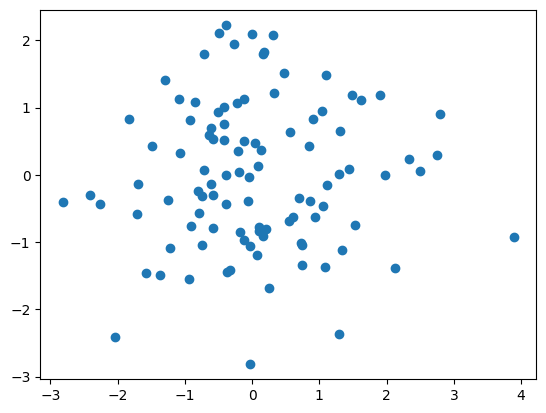

In [5]:
np.random.seed(9)
x = tadasets.dsphere(n=100, d=1,r=3, noise=0.9)
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.show()

In [6]:
result = ripser(x,maxdim=2)
diagrams = result['dgms']

In [9]:
dmg0 = diagrams[0]
Comp_Conexas = pd.DataFrame(dmg0, columns=['Birth', 'Death'])
Comp_Conexas['Life'] = Comp_Conexas['Death'] - Comp_Conexas['Birth']
Comp_Conexas = Comp_Conexas.sort_values(by='Life', ascending=False)
Comp_Conexas.head(10)

,Birth,Death,Life
99,0.0,inf,inf
98,0.0,1.659315,1.659315
97,0.0,1.162477,1.162477
96,0.0,1.049132,1.049132
95,0.0,1.021835,1.021835
94,0.0,0.832687,0.832687
93,0.0,0.612771,0.612771
92,0.0,0.572175,0.572175
91,0.0,0.551666,0.551666
90,0.0,0.528162,0.528162


In [11]:
s = pd.Series(range(0,100))
Comp_Conexas['Componente'] = s



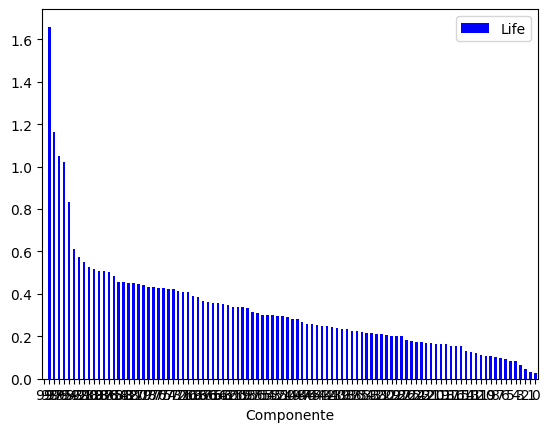

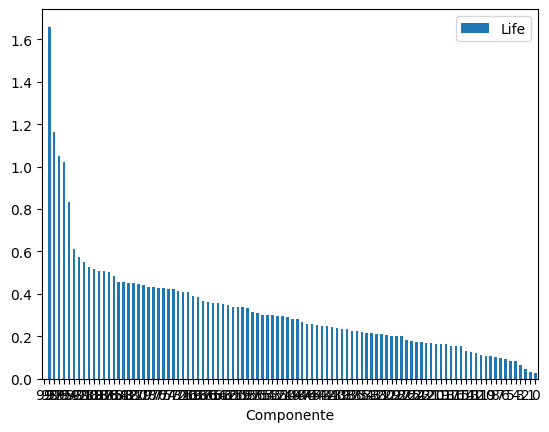

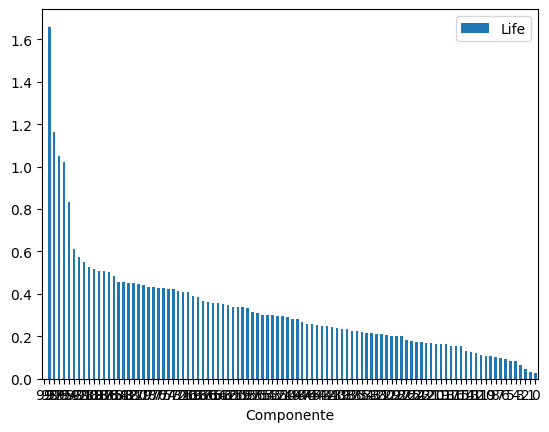

In [14]:
Comp_Conexas.plot.bar(x='Componente', y='Life', rot=0)
plt.show()

In [15]:
dmg1= diagrams[1]
Comp_Conexas = pd.DataFrame(dmg1, columns=['Birth', 'Death'])
Comp_Conexas['Life'] = Comp_Conexas['Death'] - Comp_Conexas['Birth']
Comp_Conexas = Comp_Conexas.sort_values(by='Life', ascending=False)
Comp_Conexas.head(10)

,Birth,Death,Life
9,0.572280,0.805268,0.232988
2,0.705481,0.883802,0.178321
7,0.603695,0.779408,0.175713
4,0.634365,0.802383,0.168018
5,0.625535,0.792885,0.167350
0,0.940141,1.104264,0.164123
18,0.357506,0.506674,0.149169
11,0.547222,0.622470,0.075248
6,0.607225,0.678948,0.071724
17,0.382316,0.448806,0.066489


In [16]:
s=pd.Series(range(0,100))
Comp_Conexas['Componente'] = s


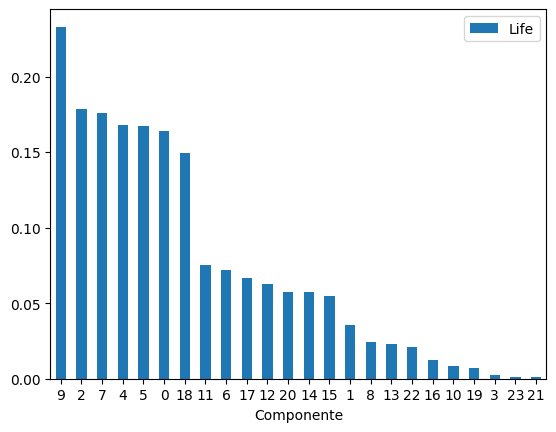

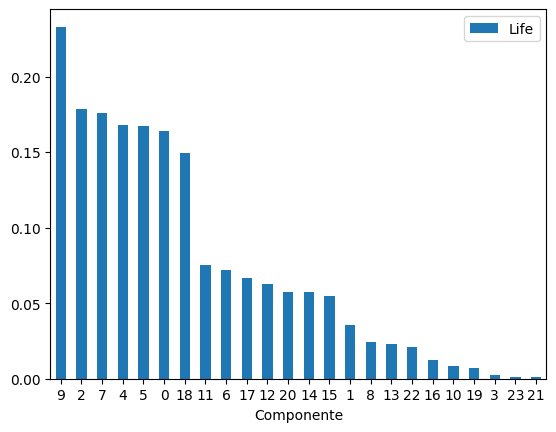

In [20]:
Comp_Conexas.plot.bar(x='Componente', y='Life', rot=0)
plt.show()

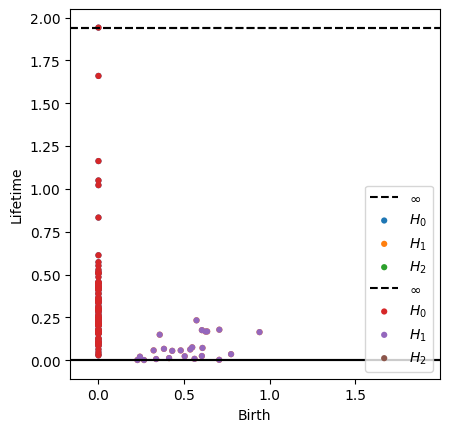

In [22]:
plot_diagrams(diagrams, lifetime=True)
plt.show()

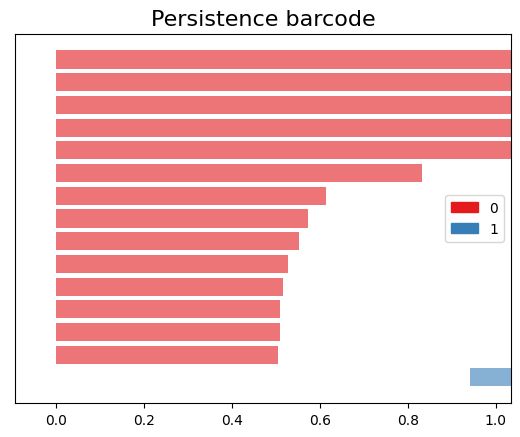

In [27]:
import gudhi
rips_complex = gudhi.RipsComplex(points=x, max_edge_length=1.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
#Notemos con esta paqueteria se queda con lo mas significativo si cambiamos la persistencia

diag0= simplex_tree.persistence(min_persistence=0.5)
gudhi.plot_persistence_barcode(diag0)
plt.show()

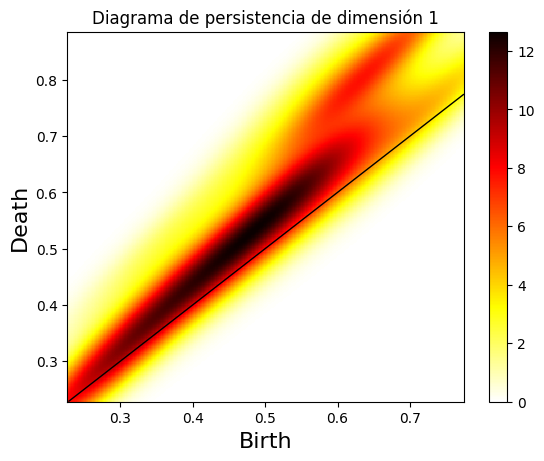

In [29]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag_infty = simplex_tree.persistence(min_persistence = 0)
gudhi.plot_persistence_density(diag_infty,legend=True,max_intervals=1000,dimension=1)
plt.title('Diagrama de persistencia de dimensión 1')
plt.show()